In [259]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd

In [260]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [261]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

### quest4
- 분석 제공 대상이 의사
- 목표변수 : 수술시간
- 설명 변수 지정 최소 5개 이상(범주형 과 연속형 섞여 있어야함)
- DDA/README.md 작성 : 변수 설명/ 이유
- 추출, 수술시간이 중앙값 이상인 것만 추출.
- 요약 : 수술시간에 가장 영향을 주는 항목 3가지 확인


In [262]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [263]:
df_ROS_forpatient = df_ROS[['성별', '신장', '체중', '흡연여부', '직업','수술시간']]
df_ROS_forpatient

,성별,신장,체중,흡연여부,직업,수술시간
0,2,163,60.3,0,자영업,68.0
1,1,171,71.7,0,운동선수,31.0
2,1,178,77.1,0,특수전문직,78.0
3,1,174,74.2,0,주부,73.0
4,1,183,80.7,0,특수전문직,29.0
...,...,...,...,...,...,...
1889,2,157,64.0,0,무직,80.0
1890,2,157,59.0,0,사무직,20.0
1891,1,167,70.0,0,무직,50.0
1892,1,177,77.0,0,사무직,25.0


In [264]:
df_ROS_forpatient.describe()

,성별,신장,체중,흡연여부,수술시간
count,1894.000000,1894.000000,1894.000000,1894.000000,1840.000000
mean,1.383316,168.027983,68.111140,0.217001,62.066304
std,0.486323,9.211419,11.234318,0.412312,24.994615
min,1.000000,140.000000,35.000000,0.000000,5.000000
25%,1.000000,161.000000,59.700000,0.000000,45.000000
50%,1.000000,169.000000,68.000000,0.000000,60.000000
75%,2.000000,175.000000,75.000000,0.000000,77.000000
max,2.000000,204.000000,136.100000,1.000000,220.000000


In [294]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   체중      1894 non-null   float64
 3   흡연여부    1894 non-null   int64  
 4   직업      1479 non-null   object 
 5   수술시간    1840 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 88.9+ KB


## 성별에 따른 수술시간 데이터 분석

<Axes: xlabel='성별', ylabel='count'>

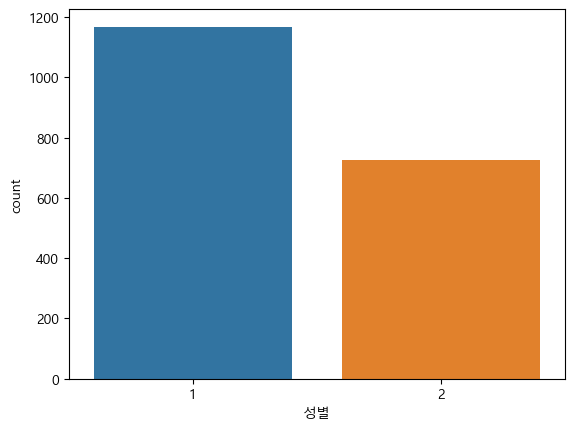

In [299]:
sns.countplot(data=df_ROS_forpatient, x='성별')

In [300]:
df_ROS_gender = df_ROS_forpatient[['성별', '수술시간']]
df_ROS_gender[df_ROS_forpatient['성별'] == 1].mean()

성별       1.000000
수술시간    61.856014
dtype: float64

In [301]:
df_ROS_gender = df_ROS_forpatient[['성별', '수술시간']]
df_ROS_gender[df_ROS_forpatient['성별'] == 2].mean()

성별       2.000000
수술시간    62.407989
dtype: float64

In [302]:
df_ROS_gender = df_ROS_gender.pivot_table(index='성별', values='수술시간', aggfunc=np.mean)
df_ROS_gender

,수술시간
성별,
1,61.856014
2,62.407989


## 흡연 여부에 따른 데이터 분석

<Axes: xlabel='흡연여부', ylabel='count'>

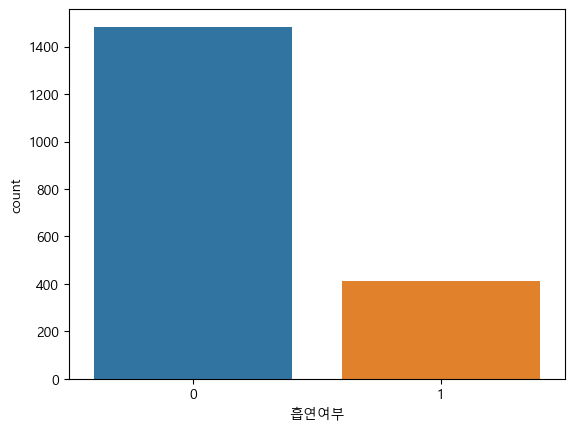

In [303]:
sns.countplot(data=df_ROS_forpatient, x='흡연여부')

In [269]:
df_ROS_smoke = df_ROS_forpatient[['흡연여부', '수술시간']]
df_ROS_smoke[df_ROS_forpatient['흡연여부'] == 0].mean()

흡연여부     0.000000
수술시간    62.361554
dtype: float64

In [270]:
df_ROS_smoke = df_ROS_forpatient[['흡연여부', '수술시간']]
df_ROS_smoke[df_ROS_forpatient['흡연여부'] == 1].mean()

흡연여부     1.0
수술시간    61.0
dtype: float64

In [271]:
df_ROS_smoke = df_ROS_smoke.pivot_table(index='흡연여부', values='수술시간', aggfunc=np.mean)
df_ROS_smoke

,수술시간
흡연여부,
0,62.361554
1,61.000000


## 신장 크기에 따른 수술시간 데이터 분석

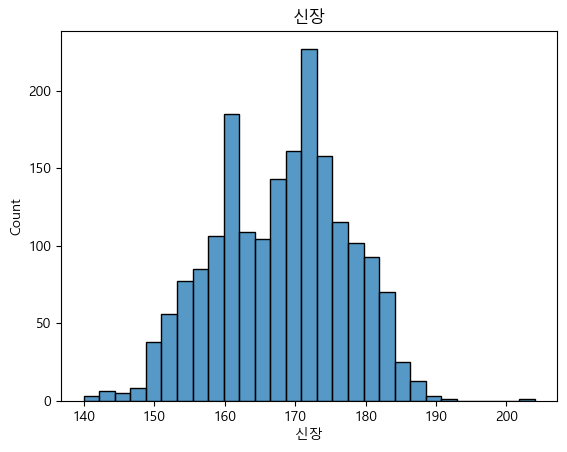

In [311]:
sns.histplot(data=df_ROS_forpatient, x='신장')
plt.title("신장")
plt.show()

In [272]:
df_ROS_forpatient['신장'].mean()

168.02798310454065

In [273]:
df_ROS_height = df_ROS_forpatient[['수술시간']]
df_ROS_height_1 = df_ROS_height[df_ROS_forpatient['신장'] >= 168].mean()
df_ROS_height_1 = pd.DataFrame(df_ROS_height_1, columns=['168cm 미만']).transpose()
df_ROS_height_1

,수술시간
168cm 미만,60.983202


In [274]:
df_ROS_height = df_ROS_forpatient[['수술시간']]
df_ROS_height_2 = df_ROS_height[df_ROS_forpatient['신장'] < 168].mean()
df_ROS_height_2 = pd.DataFrame(df_ROS_height_2, columns=['168cm 이상']).transpose()
df_ROS_height_2

,수술시간
168cm 이상,63.390097


In [275]:
df_ROS_height = pd.concat([df_ROS_height_1, df_ROS_height_2])
df_ROS_height

,수술시간
168cm 미만,60.983202
168cm 이상,63.390097


## 체중에 따른 수술시간 데이터 분석

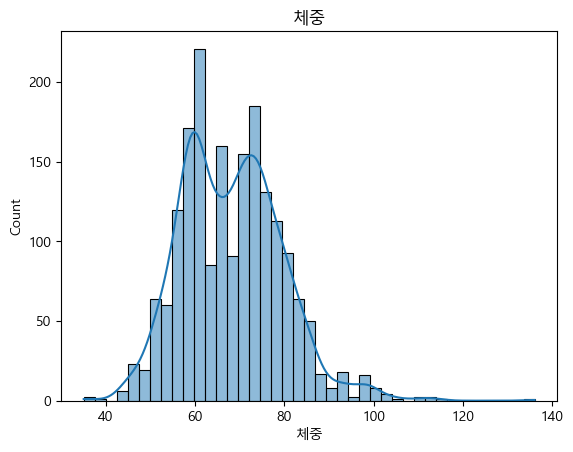

In [314]:
sns.histplot(data=df_ROS_forpatient, x='체중', kde=True)
plt.title("체중")
plt.show()

In [276]:
df_ROS_forpatient['체중'].mean()

68.1111404435058

In [277]:
df_ROS_weight = df_ROS_forpatient[['수술시간']]
df_ROS_weight_1 = df_ROS_weight[df_ROS_forpatient['체중'] >= 68].mean()
df_ROS_weight_1 = pd.DataFrame(df_ROS_weight_1, columns=['68kg 이상']).transpose()
df_ROS_weight_1

,수술시간
68kg 이상,62.427027


In [278]:
df_ROS_weight = df_ROS_forpatient[['수술시간']]
df_ROS_weight_2 = df_ROS_weight[df_ROS_forpatient['체중'] < 68].mean()
df_ROS_weight_2 = pd.DataFrame(df_ROS_weight_2, columns=['68kg 미만']).transpose()
df_ROS_weight_2

,수술시간
68kg 미만,61.701639


In [279]:
df_ROS_weight = pd.concat([df_ROS_weight_1, df_ROS_weight_2])
df_ROS_weight

,수술시간
68kg 이상,62.427027
68kg 미만,61.701639


## 직업에 따른 수술시간 데이터 분석

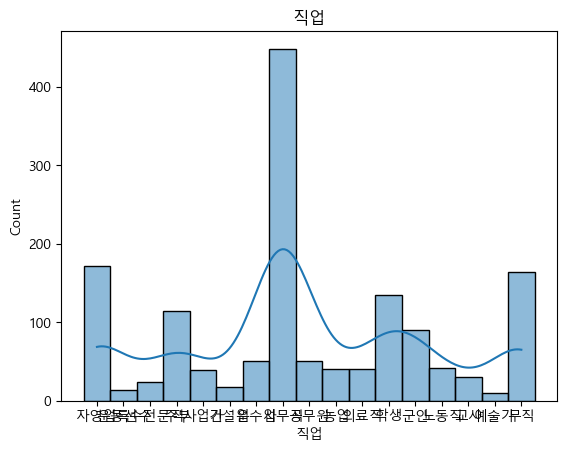

In [315]:
sns.histplot(data=df_ROS_forpatient, x='직업', kde=True)
plt.title("직업")
plt.show()

In [280]:
pd.pivot_table(df_ROS_forpatient[['직업', '수술시간']], index=['직업'], values=['수술시간'], aggfunc=np.mean)

,수술시간
직업,
건설업,58.647059
공무원,65.448980
교사,64.250000
군인,62.022989
노동직,65.738095
농업,75.102564
무직,54.814815
사무직,61.543379
사업가,64.131579


In [281]:
## 최대 수술시간인 직업 및 시간

In [282]:
df_ROS_job = pd.pivot_table(df_ROS_forpatient[['직업', '수술시간']], index=['직업'], values=['수술시간'], aggfunc=np.mean)
df_ROS_job

,수술시간
직업,
건설업,58.647059
공무원,65.448980
교사,64.250000
군인,62.022989
노동직,65.738095
농업,75.102564
무직,54.814815
사무직,61.543379
사업가,64.131579


In [283]:
df_ROS_max_job = df_ROS_job.loc[df_ROS_job.idxmax()]
df_ROS_max_job

,수술시간
직업,
농업,75.102564


In [284]:
df_ROS_min_job = df_ROS_job.loc[df_ROS_job.idxmin()]
df_ROS_min_job

,수술시간
직업,
운동선수,50.857143


In [285]:
result = pd.concat([df_ROS_max_job, df_ROS_min_job])
result

,수술시간
직업,
농업,75.102564
운동선수,50.857143


## 수술 시간 데이터 분석

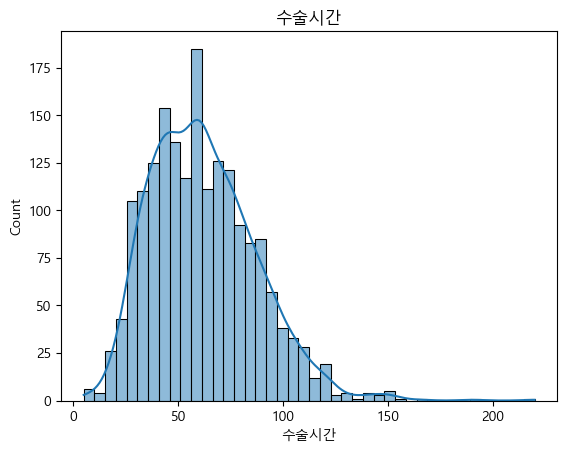

In [316]:
sns.histplot(data=df_ROS_forpatient, x='수술시간', kde=True)
plt.title("수술시간")
plt.show()

In [286]:
condition = df_ROS_forpatient['수술시간'].median()

In [287]:
df_ROS_forpatient[(df_ROS_forpatient['수술시간'] >= condition)]

,성별,신장,체중,흡연여부,직업,수술시간
0,2,163,60.3,0,자영업,68.0
2,1,178,77.1,0,특수전문직,78.0
3,1,174,74.2,0,주부,73.0
7,1,183,81.2,1,NaN,85.0
12,1,174,74.4,0,NaN,94.0
...,...,...,...,...,...,...
1876,2,151,60.0,0,농업,110.0
1877,1,180,78.0,1,농업,90.0
1885,1,179,75.0,1,의료직,70.0
1887,2,163,56.0,0,무직,75.0


In [288]:
## 수술시간 정렬
df_ROS_forpatient[(df_ROS_forpatient['수술시간'] >= condition)].sort_values(by=['수술시간'])

,성별,신장,체중,흡연여부,직업,수술시간
770,2,161,55.0,0,사무직,60.0
1566,1,170,72.0,0,군인,60.0
1565,2,170,55.0,0,사무직,60.0
977,2,160,60.0,0,주부,60.0
1563,1,165,65.0,0,무직,60.0
...,...,...,...,...,...,...
347,1,167,69.0,0,사무직,152.0
1428,2,162,60.0,0,NaN,155.0
1086,1,174,67.0,0,사무직,165.0
1128,2,163,70.0,0,NaN,190.0


In [289]:
list_med = ['체중','체중','신장', '신장', '흡연여부', '흡연여부', '성별', '성별', '직업', '직업']

In [290]:
df = pd.concat([df_ROS_height, df_ROS_weight, df_ROS_smoke, df_ROS_gender, result], join='inner')
df

,수술시간
168cm 미만,60.983202
168cm 이상,63.390097
68kg 이상,62.427027
68kg 미만,61.701639
0,62.361554
1,61.000000
1,61.856014
2,62.407989
농업,75.102564
운동선수,50.857143


In [291]:
df = pd.concat([df_ROS_height, df_ROS_weight, df_ROS_smoke, df_ROS_gender, result], join='inner')
df["구분"] = list_med
df.rename(columns={"수술시간":"평균 수술시간"}, inplace=True)
df = df.set_index(keys="구분",append=True)
df

평균 수술시간
         구분             
168cm 미만 체중    60.983202
168cm 이상 체중    63.390097
68kg 이상  신장    62.427027
68kg 미만  신장    61.701639
0        흡연여부  62.361554
1        흡연여부  61.000000
         성별    61.856014
2        성별    62.407989
농업       직업    75.102564
운동선수     직업    50.857143

In [292]:
df_end = df.reorder_levels([1,0])
df_end

평균 수술시간
구분                      
체중   168cm 미만  60.983202
     168cm 이상  63.390097
신장   68kg 이상   62.427027
     68kg 미만   61.701639
흡연여부 0         62.361554
     1         61.000000
성별   1         61.856014
     2         62.407989
직업   농업        75.102564
     운동선수      50.857143

# 